In [13]:
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from numpy import nan as NA

During the course of doing data analysis and modeling, a significant amount of time
is spent on data preparation: loading, cleaning, transforming, and rearranging. Such
tasks are often reported to take up 80% or more of an analyst’s time. Sometimes the
way that data is stored in files or databases is not in the right format for a particular
task.

Fortunately, pandas, along with the
built-in Python language features, provides you with a high-level, flexible, and fast set
of tools to enable you to manipulate data into the right form.

##  Handling Missing Data

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [3]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

#### NOTE: The built-in Python None value is also treated as NA in object arrays:

In [4]:
string_data[0] = None

In [5]:
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

In [6]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

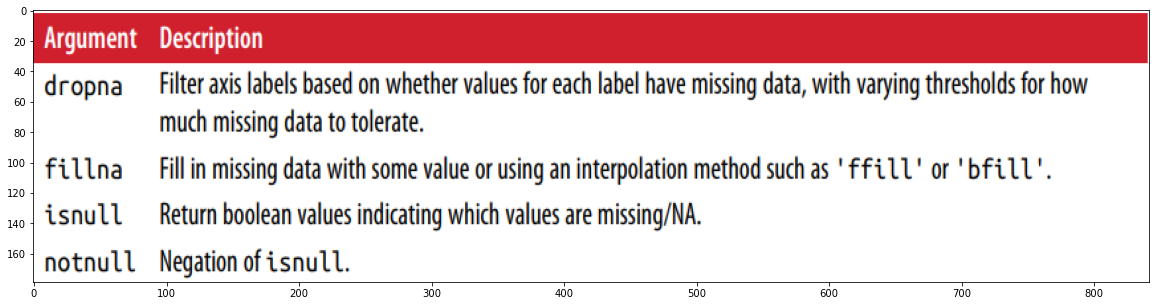

In [12]:
img = imread('C:/Users/HCL/Desktop/handling_missing_values.png')
plt.figure(figsize = (20,5))
plt.imshow(img, aspect = 'auto')

## Filtering Out Missing Data


In [14]:
data = pd.Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [15]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

You may want to drop rows
or columns that are all NA or only those containing any NAs. dropna by default drops
any row containing a missing value:

In [17]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
 ....: [NA, NA, NA], [NA, 6.5, 3.]])

data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [19]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


Passing how='all' will only drop rows that are all NA:

In [20]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


To drop columns in the same way, pass axis=1:

In [21]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [23]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


A related way to filter out DataFrame rows tends to concern time series data. Suppose
you want to keep only rows containing a certain number of observations. You can
indicate this with the thresh argument:

In [24]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,0.681762,NaN,NaN
1,0.416538,NaN,NaN
2,-1.365735,NaN,0.715843
3,1.354754,NaN,0.075868
4,-0.394974,0.703700,-2.066103
5,1.435747,-1.623345,0.249968
6,0.640127,0.056843,0.003693


In [25]:
 df.dropna()

,0,1,2
4,-0.394974,0.703700,-2.066103
5,1.435747,-1.623345,0.249968
6,0.640127,0.056843,0.003693


In [26]:
df.dropna(thresh=2)

,0,1,2
2,-1.365735,NaN,0.715843
3,1.354754,NaN,0.075868
4,-0.394974,0.703700,-2.066103
5,1.435747,-1.623345,0.249968
6,0.640127,0.056843,0.003693


## Filling In Missing Data


Rather than filtering out missing data (and potentially discarding other data along
with it), you may want to fill in the “holes” in any number of ways. For most pur‐
poses, the fillna method is the workhorse function to use. Calling fillna with a
constant replaces missing values with that value:

In [27]:
df.fillna(0)

,0,1,2
0,0.681762,0.000000,0.000000
1,0.416538,0.000000,0.000000
2,-1.365735,0.000000,0.715843
3,1.354754,0.000000,0.075868
4,-0.394974,0.703700,-2.066103
5,1.435747,-1.623345,0.249968
6,0.640127,0.056843,0.003693


Calling fillna with a dict, you can use a different fill value for each column:

In [29]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.681762,0.500000,0.000000
1,0.416538,0.500000,0.000000
2,-1.365735,0.500000,0.715843
3,1.354754,0.500000,0.075868
4,-0.394974,0.703700,-2.066103
5,1.435747,-1.623345,0.249968
6,0.640127,0.056843,0.003693


#### NOTE: fillna returns a new object, but you can modify the existing object in-place:

In [30]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,0.681762,0.000000,0.000000
1,0.416538,0.000000,0.000000
2,-1.365735,0.000000,0.715843
3,1.354754,0.000000,0.075868
4,-0.394974,0.703700,-2.066103
5,1.435747,-1.623345,0.249968
6,0.640127,0.056843,0.003693


The same interpolation methods available for reindexing can be used with fillna:


In [31]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,1.895081,-0.172229,-0.011033
1,0.835446,1.060872,0.686516
2,0.632982,NaN,-0.761358
3,-0.564495,NaN,1.585403
4,0.563801,NaN,NaN
5,-1.324380,NaN,NaN


In [32]:
df.fillna(method='ffill')

,0,1,2
0,1.895081,-0.172229,-0.011033
1,0.835446,1.060872,0.686516
2,0.632982,1.060872,-0.761358
3,-0.564495,1.060872,1.585403
4,0.563801,1.060872,1.585403
5,-1.324380,1.060872,1.585403


In [33]:
df.fillna(method='ffill', limit = 2)

,0,1,2
0,1.895081,-0.172229,-0.011033
1,0.835446,1.060872,0.686516
2,0.632982,1.060872,-0.761358
3,-0.564495,1.060872,1.585403
4,0.563801,NaN,1.585403
5,-1.324380,NaN,1.585403


###### With fillna you can do lots of other things with a little creativity. For example, you might pass the mean or median value of a Series:


In [34]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

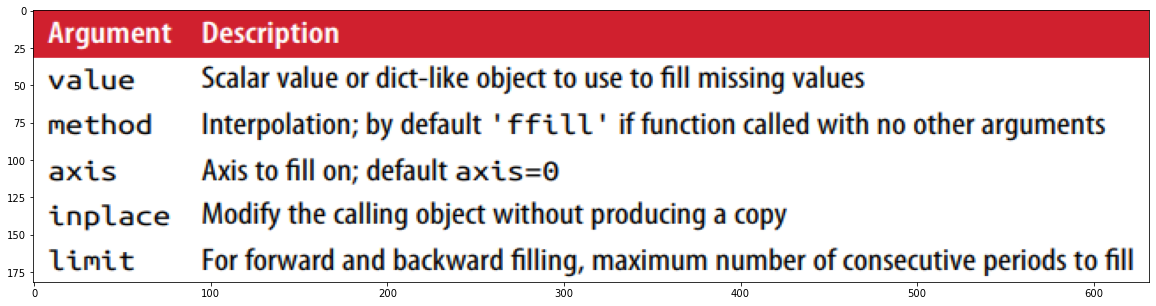

In [35]:
img = imread('C:/Users/HCL/Desktop/fillna_function_arguments.png')
plt.figure(figsize = (20,5))
plt.imshow(img, aspect = 'auto')

# Data Transformation

## Removing Duplicates


In [37]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
 ....: 'k2': [1, 1, 2, 3, 3, 4, 4]})

data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


The DataFrame method duplicated returns a boolean Series indicating whether each
row is a duplicate (has been observed in a previous row) or not:

In [38]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

Relatedly, drop_duplicates returns a DataFrame where the duplicated array is
False:


In [39]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


Both of these methods by default consider all of the columns; alternatively, you can
specify any subset of them to detect duplicates. Suppose we had an additional column
of values and wanted to filter duplicates only based on the 'k1' column:

In [40]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


duplicated and drop_duplicates by default keep the first observed value combina‐
tion. Passing keep='last' will return the last one:

In [41]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


## Transforming Data Using a Function or Mapping


For many datasets, you may wish to perform some transformation based on the val‐
ues in an array, Series, or column in a DataFrame. Consider the following hypotheti‐
cal data collected about various kinds of meat:

In [43]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
 ....: 'Pastrami', 'corned beef', 'Bacon',
 ....: 'pastrami', 'honey ham', 'nova lox'],
 ....: 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


Suppose you wanted to add a column indicating the type of animal that each food
came from. Let’s write down a mapping of each distinct meat type to the kind of
animal:

In [44]:
meat_to_animal = {
 'bacon': 'pig',
 'pulled pork': 'pig',
 'pastrami': 'cow',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon'
}

The map method on a Series accepts a function or dict-like object containing a map‐
ping, but here we have a small problem in that some of the meats are capitalized and
others are not. Thus, we need to convert each value to lowercase using the str.lower
Series method:

In [45]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [46]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


##### Using map is a convenient way to perform element-wise transformations and other data cleaning–related operations.

## Replacing Values


Filling in missing data with the fillna method is a special case of more general value
replacement. As you’ve already seen, map can be used to modify a subset of values in
an object but replace provides a simpler and more flexible way to do so. Let’s con‐
sider this Series:

In [47]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

The -999 values might be sentinel values for missing data. To replace these with NA
values that pandas understands, we can use replace, producing a new Series (unless
you pass inplace=True):

In [48]:
data.replace(-999, NA)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

If you want to replace multiple values at once, you instead pass a list and then the
substitute value:

In [49]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

To use a different replacement for each value, pass a list of substitutes:


In [50]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

The argument passed can also be a dict:

In [51]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

##### The data.replace method is distinct from data.str.replace, which performs string substitution element-wise.

## Renaming Axis Indexes
